[View in Colaboratory](https://colab.research.google.com/github/AvijitGhosh82/Finance_Graph_Theory/blob/master/GrowthModels.ipynb)

In [1]:
! rm -rf  Finance_Graph_Theory
! git clone https://github.com/AvijitGhosh82/Finance_Graph_Theory

Cloning into 'Finance_Graph_Theory'...
remote: Counting objects: 129, done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 129 (delta 49), reused 44 (delta 11), pack-reused 0
Receiving objects: 100% (129/129), 4.34 MiB | 17.79 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [0]:
import pandas as pd
df = pd.read_csv('Finance_Graph_Theory/Country.csv')
df.dtypes

In [38]:
df = df.groupby(['Country']).sum()
df.head(5)


,AUS,AUS.1,AUS.2,AUS.3,AUS.4,AUS.5,AUS.6,AUS.7,AUS.8,AUS.9,...,ROW.46,ROW.47,ROW.48,ROW.49,ROW.50,ROW.51,ROW.52,ROW.53,ROW.54,ROW.55
Country,,,,,,,,,,,,,,,,,,,,,
AUS,22743,983,736,45918,44552,2679,5094,3962,3062,13648,...,194,0,173,190,1428,1172,580,533,0,0
AUT,9,0,0,23,11,3,1,4,3,1,...,90,0,87,103,561,336,327,247,0,0
BEL,20,0,0,33,18,3,2,8,5,2,...,135,0,168,205,947,549,637,489,0,0
BGR,0,0,0,0,0,0,0,0,0,0,...,10,0,16,22,117,62,87,54,0,0
BRA,17,0,0,11,52,6,1,4,4,3,...,80,0,149,166,774,488,521,548,0,0


In [45]:
df_trans = df.T
# df_trans.index.names = ['index']
df_trans.to_csv('temp.csv')
df_trans = pd.read_csv('temp.csv')
df_trans.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df_trans['Country'] = df_trans['Country'].astype(str).str[:3]
df_trans = df_trans.groupby(['Country']).sum()
df_trans.to_csv('Countrytrans.csv')
df_trans

,AUS,AUT,BEL,BGR,BRA,CAN,CHE,CHN,CYP,CZE,...,PRT,ROU,ROW,RUS,SVK,SVN,SWE,TUR,TWN,USA
Country,,,,,,,,,,,,,,,,,,,,,
AUS,904769,353,479,1,405,931,979,11328,0,72,...,28,5,48076,320,6,7,776,191,1766,10805
AUT,28,265580,1524,227,120,168,3440,1169,28,3874,...,134,838,7235,2029,2080,1009,942,580,242,2009
BEL,317,1351,337154,704,1565,991,3641,5304,65,1686,...,573,459,19054,1891,296,209,2839,1246,310,11299
BGR,0,379,99,45958,79,47,46,177,37,166,...,9,576,2759,3100,46,29,33,1048,33,158
BRA,1031,741,937,23,1182689,1043,1091,7430,0,192,...,390,25,49164,774,17,10,691,654,3057,15201
CAN,1049,722,614,28,1926,950476,2240,10354,5,121,...,121,200,34377,995,30,23,756,356,2518,122728
CHE,584,4696,4552,23,237,853,431931,1779,10,833,...,383,244,9652,1448,102,153,2116,1494,166,6484
CHN,33353,2096,4002,87,19782,8436,2567,9253666,26,648,...,227,147,292688,16383,96,32,4021,1341,57784,42414
CYP,1,105,84,25,6,0,78,116,13773,25,...,6,41,1017,282,14,0,34,229,2,51


# Growth Models

**Remember to make github private after every coding session**

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
import scipy.cluster.vq as vq
import numpy.linalg as la # For finding eigenvalues and eigenvectors
import itertools
from networkx.algorithms.community.centrality import girvan_newman
import pandas as pd
import io

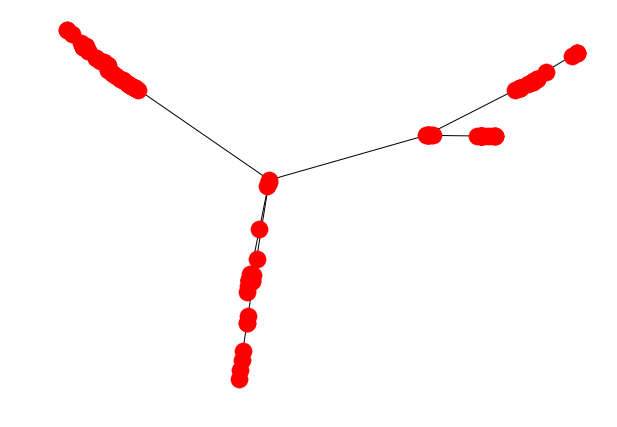

In [0]:
G = nx.powerlaw_cluster_graph(100, 1, 0.0)
#pos = nx.spring_layout(G)  # For B-A graph
pos = nx.spectral_layout(G) # For powerlaw cluster graph
nx.draw(G,pos)
plt.show()

In [0]:
print uploaded[]

In [0]:
k = 10
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print (len([len(c) for c in sorted(communities,key=len,reverse=True)]))
    

2
3
4
5
6
7
8
9
10
